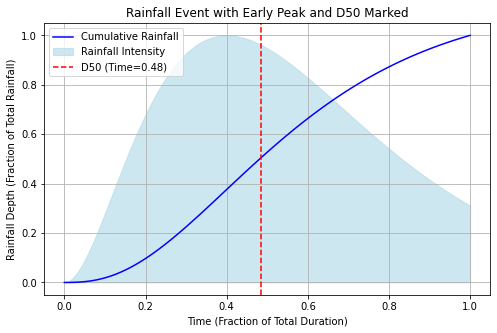

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate time as a fraction of total storm duration (0 to 1)
time = np.linspace(0, 1, 100)

# Create a rainfall event with an early peak and decaying intensity
# Example: Using a gamma distribution to simulate this shape
rainfall_intensity = np.exp(-5 * time) * (10 * time**2)  # Early peak, decaying over time
rainfall_intensity = rainfall_intensity / np.max(rainfall_intensity)  # Normalize to range [0,1]

# Calculate cumulative rainfall depth as a fraction of total rainfall
cumulative_rainfall = np.cumsum(rainfall_intensity) / np.sum(rainfall_intensity)

# Find the D50 value (when 50% of cumulative rainfall has occurred)
D50_index = np.where(cumulative_rainfall >= 0.5)[0][0]
D50_time = time[D50_index]

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(time, cumulative_rainfall, label='Cumulative Rainfall', color='blue')
plt.fill_between(time, 0, rainfall_intensity, color='lightblue', alpha=0.6, label='Rainfall Intensity')

# Mark the D50 value with a red vertical line
plt.axvline(D50_time, color='red', linestyle='--', label=f'D50 (Time={D50_time:.2f})')

# Add labels and legend
plt.title('Rainfall Event with Early Peak and D50 Marked')
plt.xlabel('Time (Fraction of Total Duration)')
plt.ylabel('Rainfall Depth (Fraction of Total Rainfall)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


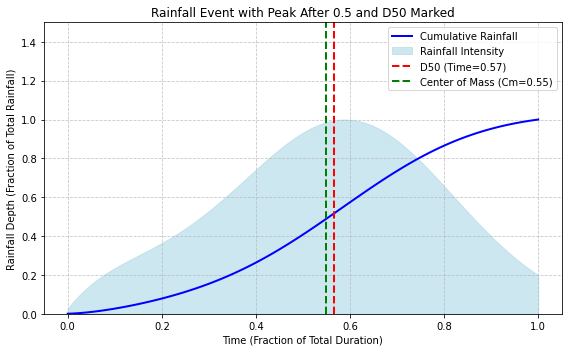

Center of Mass (Cm): 0.55
D50 Time: 0.57


In [27]:
# Simulate time as a fraction of total storm duration (0 to 1)
time = np.linspace(0, 1, 100)

# Create a rainfall event with an early buildup and peak intensity after 0.5
# Adjusting parameters to achieve the desired properties
early_buildup = np.exp(-6 * time) * (3 * time)  # Early buildup for quick accumulation
late_peak_time = 0.6  # Peak happens after 0.5
late_peak = np.exp(-10 * (time - late_peak_time) ** 2)  # Gaussian peak

# Combine the early buildup and late peak
rainfall_intensity = early_buildup + late_peak
rainfall_intensity = rainfall_intensity / np.max(rainfall_intensity)  # Normalize to range [0, 1]

# Calculate cumulative rainfall depth as a fraction of total rainfall
cumulative_rainfall = np.cumsum(rainfall_intensity) / np.sum(rainfall_intensity)

# Find the D50 value (when 50% of cumulative rainfall has occurred)
D50_index = np.where(cumulative_rainfall >= 0.5)[0][0]
D50_time = time[D50_index]

# Calculate the center of mass (Cm)
Cm = np.sum(rainfall_intensity * time) / np.sum(rainfall_intensity)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(time, cumulative_rainfall, label='Cumulative Rainfall', color='blue', linewidth=2)
plt.fill_between(time, 0, rainfall_intensity, color='lightblue', alpha=0.6, label='Rainfall Intensity')

# Mark the D50 value with a red vertical line
plt.axvline(D50_time, color='red', linestyle='--', linewidth=2, label=f'D50 (Time={D50_time:.2f})')

# Mark the center of mass with a green vertical line
plt.axvline(Cm, color='green', linestyle='--', linewidth=2, label=f'Center of Mass (Cm={Cm:.2f})')

# Add labels and legend
plt.title('Rainfall Event with Peak After 0.5 and D50 Marked')
plt.xlabel('Time (Fraction of Total Duration)')
plt.ylabel('Rainfall Depth (Fraction of Total Rainfall)')
plt.legend()

# Emphasize grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0, 1.5)

# Show the plot
plt.show()

# Print the computed values
print(f"Center of Mass (Cm): {Cm:.2f}")
print(f"D50 Time: {D50_time:.2f}")


In [7]:
import pandas as pd
df = pd.DataFrame({'precipitation (mm)': rainfall_intensity})

,precipitation (mm)
0,0.000000
1,0.004480
2,0.017039
3,0.036449
4,0.061606
...,...
95,0.350714
96,0.340498
97,0.330508
98,0.320742


In [9]:
import pandas as pd

def calculate_storm_center_of_mass(event_df):
    """
    Calculate the center of mass of a rainstorm based on a sequence of precipitation values.
    
    Parameters:
    - event_df: A DataFrame containing 'precipitation (mm)' column, with each row representing
                an equal time interval.
    
    Returns:
    - Center of mass of the rainstorm (Cm), a value between 0 and 1.
    """
    # Calculate relative positions (time steps) normalized from 0 to 1
    event_df['normalized_time'] = event_df.index / (len(event_df) - 1)
    
    # Calculate total rainfall
    total_rainfall = event_df['precipitation (mm)'].sum()
    
    # Calculate the center of mass (Cm)
    Cm = (event_df['precipitation (mm)'] * event_df['normalized_time']).sum() / total_rainfall
    
    return Cm


In [10]:
calculate_storm_center_of_mass(df)

0.5049826856516583